![banner_eda](https://github.com/cistelsa/Commerce_Data_Analysis_and_Recommendations/blob/main/5_Sources/Images/banner_eda.gif?raw=true)
# <h1 align=center> <font color='#307A71'>**EDA - REVIEWS**</font> </h1>
## <h1 align=center> (Exploratory, Data, Analysis) </h1>

Para el desarrollo de la primera fase del proyecto, realizaremos la aplicación del proceso EDA.

El **`Análisis Exploratorio de Datos (Exploratory Data Analysis o EDA, por sus siglas en inglés)`** es un enfoque fundamental en la estadística y la ciencia de datos que implica investigar y examinar un conjunto de datos de manera visual y estadística para extraer información, identificar patrones, detectar anomalías y generar hipótesis iniciales. El EDA se realiza antes de aplicar modelos más complejos o análisis estadísticos avanzados y tiene como objetivo comprender la naturaleza y las características del conjunto de datos en cuestión.

En este documento se encuentra un reporte preliminar de la calidad de los Datos obtenidos del _Dataset Reviews_, de la plataforma Yelp. Inicialmente se trabajará una Data que contiene solo los datos filtrados por categorías de Hoteles.

## <font color='#307A71'>**A. Importando los datos**</font>

<font color='#307A71'>**1. Instalación:**</font>  se procede a instalar las aplicaciones e importación de librerías a utilizar.

In [1]:
pip install wordcloud

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 3, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 12.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd                 # dataframes
import matplotlib.pyplot as plt     # plots
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import seaborn as sns               # plots
import numpy as np                  # manejo de arrays
from datetime import datetime       # formato de fechas
from math import ceil               # redondeo
from pyspark.sql.functions import col
# import os
import calendar
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
# from textblob import TextBlob
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import string
# import re

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 4, Finished, Available)

<font color='#307A71'>**2. Cargue Información:**</font> </h1>  Cargue del DataFrame desde el Dataset Review, con Spark.

In [3]:
df_review = spark.read.parquet("Files/data/original/Yelp/review.parquet")

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 5, Finished, Available)

<font color='#307A71'>**3. Consultar Data:**</font> </h1> Lectura del DataFrame.

In [4]:
df_review = df_review.toPandas()
df_review.head()

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 6, Finished, Available)

,business_id,review_id,user_id,stars,useful,funny,cool,text,date
0,n5P6-HWN3kFSYBxfVfDxEg,Poy3mAHxbbXmnxpagfVZyA,M3nt04JUU-r73VC2lwUSMA,NaN,7,9,2,I mistakenly left my organizer/wallet on my ta...,2012-06-26 01:32:56
1,Xq-8-I0U8Artr7d70SjX-g,yvTEMKzV5CFKhw1-Jf7oCA,ITa3vh5ERI90G_WP4SmGUQ,NaN,14,26,11,The Good.\n\n-There's a very decent hoagie sho...,2010-08-22 12:27:12
2,Z2ltNYVxmLaLGNVB7yFWQA,kdgC1ErBRXCtOWq9KEXsxQ,8ZryN_S-n48g6rsa3W3QtQ,NaN,19,17,17,Dang! another car rental review. \n\nBooked a ...,2013-05-16 22:45:33
3,Xq-8-I0U8Artr7d70SjX-g,FL2TY1dwmVQ2lm1lIkcwzQ,2lFni8ituUYceQJPxlUy_w,NaN,2,14,1,"""Squawk!""\n\nI turned to my left.\n\n""SQUAWK!""...",2011-10-28 23:42:16
4,Xq-8-I0U8Artr7d70SjX-g,R90fF9z_wxl5OrrmpLHuHg,SlH3DCXVxltSCo8gt9p2iQ,NaN,9,8,7,"Welcome to Philadelphia, the land of constantl...",2011-01-13 02:15:49


## <font color='#307A71'>**B. Limpieza de Datos**</font>

<font color='#307A71'>**4. Información:**</font> Se utiliza el método _.info_ para verificar la información resumida del DataFrame, incluyendo detalles sobre el tipo de datos, el uso de memoria y la existencia de valores nulos.

In [5]:
df_review.info()

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 7, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329688 entries, 0 to 329687
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   business_id  329688 non-null  object        
 1   review_id    329688 non-null  object        
 2   user_id      329688 non-null  object        
 3   stars        0 non-null       float64       
 4   useful       329688 non-null  int32         
 5   funny        329688 non-null  int32         
 6   cool         329688 non-null  int32         
 7   text         329688 non-null  object        
 8   date         329688 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 18.9+ MB


#### <font color='#307A71'>**Observaciones**</font>

- Todas las variables ya tienen configurado el tipo de formato adecuado para cada una.
- La columna _'stars'_ no tiene información por tanto se concluye que lo mejor es eliminarla.


<font color='#307A71'>**5. Eliminar Columna:**</font> Para eliminar la columna _'stars'_ del DataFrame **_df_review_**, primero se valida la cantidad de valores nulos por columna; se procede a seleccionar solo las columnas que en adelante se van a utilizar.

In [6]:
df_review.isna().sum()

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 8, Finished, Available)

business_id         0
review_id           0
user_id             0
stars          329688
useful              0
funny               0
cool                0
text                0
date                0
dtype: int64

In [7]:
df_review = df_review.loc[:,['business_id',
                            'review_id',
                            'user_id',
                            'useful',
                            'funny',
                            'cool',
                            'text',
                            'date',
                               ]]
df_review.head()

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 9, Finished, Available)

,business_id,review_id,user_id,useful,funny,cool,text,date
0,n5P6-HWN3kFSYBxfVfDxEg,Poy3mAHxbbXmnxpagfVZyA,M3nt04JUU-r73VC2lwUSMA,7,9,2,I mistakenly left my organizer/wallet on my ta...,2012-06-26 01:32:56
1,Xq-8-I0U8Artr7d70SjX-g,yvTEMKzV5CFKhw1-Jf7oCA,ITa3vh5ERI90G_WP4SmGUQ,14,26,11,The Good.\n\n-There's a very decent hoagie sho...,2010-08-22 12:27:12
2,Z2ltNYVxmLaLGNVB7yFWQA,kdgC1ErBRXCtOWq9KEXsxQ,8ZryN_S-n48g6rsa3W3QtQ,19,17,17,Dang! another car rental review. \n\nBooked a ...,2013-05-16 22:45:33
3,Xq-8-I0U8Artr7d70SjX-g,FL2TY1dwmVQ2lm1lIkcwzQ,2lFni8ituUYceQJPxlUy_w,2,14,1,"""Squawk!""\n\nI turned to my left.\n\n""SQUAWK!""...",2011-10-28 23:42:16
4,Xq-8-I0U8Artr7d70SjX-g,R90fF9z_wxl5OrrmpLHuHg,SlH3DCXVxltSCo8gt9p2iQ,9,8,7,"Welcome to Philadelphia, the land of constantl...",2011-01-13 02:15:49


<font color='#307A71'>**6. Datos por Columna:**</font> Se realiza consulta del porcentaje de datos contenidos por cada columna.

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 10, Finished, Available)

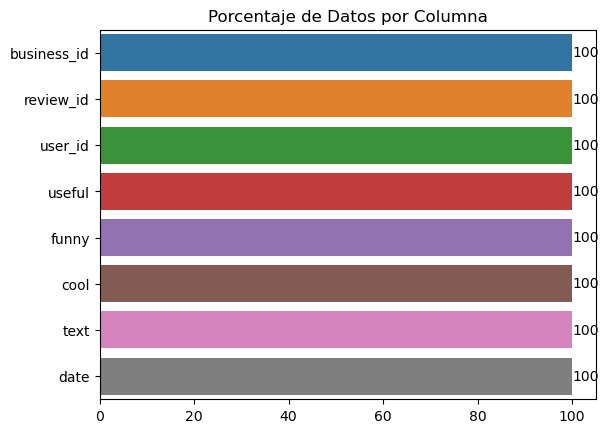

In [8]:
ax = sns.barplot(x = (round(df_review.notnull().sum()*100/df_review.shape[0])).values, y = df_review.columns)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de Datos por Columna');

* Luego de la eliminación de la columna _'stars'_ el Dataset y todas las variables cuentan con un nivel de datos del 100%, por lo cual se debe revisar con más detalle su contenido y procurar su normalización.

<font color='#307A71'>**7. Consulta Duplicado:**</font> Se valida si el DataFrame contiene valores duplicados.

In [9]:
df_duplicados = df_review[df_review.duplicated(keep=False)].copy()
df_duplicados

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 11, Finished, Available)

,business_id,review_id,user_id,useful,funny,cool,text,date


* De acuerdo con los resultados de la consulta, la Data no contiene valores duplicados o repetidos.

<font color='#307A71'>**8. Resumen Estadístico Inicial:**</font> A través del método _.describe_ se consulta las estadísticas descriptivas básicas para las columnas numéricas del DataFrame, las estadísticas que muestra son las siguientes:

- **count:** El número de observaciones no nulas en la columna. Indica cuántos valores no faltantes hay en esa columna.

- **mean:** La media aritmética de los valores en la columna. Es el promedio de todos los valores numéricos.

- **std:** La desviación estándar de los valores en la columna. Mide la dispersión o variabilidad de los datos. Valores más altos indican una mayor dispersión.

- **min:** El valor mínimo en la columna, es decir, el valor más pequeño entre todos los valores numéricos.

- **25%:** El percentil 25, también conocido como el primer cuartil. Indica el valor por debajo del cual se encuentra el 25% de los datos.

- **50%:** El percentil 50, también conocido como la mediana. Es el valor que divide el conjunto de datos en dos mitades iguales.

- **75%:** El percentil 75, también conocido como el tercer cuartil. Indica el valor por debajo del cual se encuentra el 75% de los datos.

- **max:** El valor máximo en la columna, es decir, el valor más grande entre todos los valores numéricos.

In [10]:
df_review.describe().round(2)

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 12, Finished, Available)

,useful,funny,cool
count,329688.00,329688.00,329688.00
mean,1.34,0.39,0.51
std,3.36,1.67,2.26
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,2.00,0.00,0.00
max,327.00,117.00,171.00


<font color='#307A71'>**9. Rango de Fechas:**</font> A continuación se muestra el rango de fechas en las cuales los usuarios realizaron opiniones respecto de los servicios recibidos en cada negocio.

In [11]:
fecha_minima = df_review['date'].min()
fecha_maxima = df_review['date'].max()
print("Fecha mínima:", fecha_minima)
print("Fecha máxima:", fecha_maxima)

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 13, Finished, Available)

Fecha mínima: 2005-03-09 07:18:21
Fecha máxima: 2022-01-19 19:47:59


* El Dataset contiene información de opiniones (_reviews_) de un periodo de 16 años y 10 meses

## <font color='#307A71'>**C. Visualización**</font>

Una vez que hemos terminado el proceso de limpieza, pasamos al análisis visual de los datos. Realizaremos análisis univariante y multivariante.

### <font color='#307A71'>**i. Análisis Univariante**</font>

<font color='#307A71'>**10. Valores Únicos:**</font> A continuación se relacionan los valores únicos por variables.

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 14, Finished, Available)

Text(0.5, 1.0, 'Cantidad de Valores Únicos por Columna')

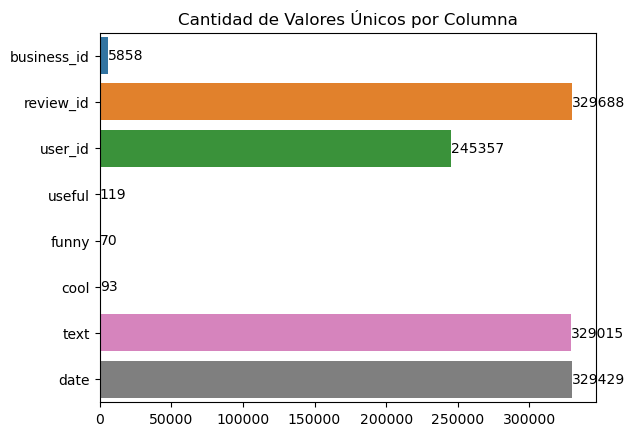

In [12]:
ax = sns.barplot(x = df_review.nunique().values, y = df_review.columns)
ax.bar_label(ax.containers[0])
plt.title('Cantidad de Valores Únicos por Columna')

Con base en los resultados se puede determinar que:

- Los ID de las _opiniones_ no se repiten, por tanto hay certeza de que no hay duplicados y que cada opinión es diferente.
- Son 245.357 usuarios los que han opinado en periodo de 16 años y 10 meses.

<font color='#307A71'>**11. Opiniones por Negocio:**</font> Teniendo en cuenta que el Dataset tiene 5.858 negocios distintos, a continuación se muestra los 20 negocios con mayor número de opiniones.

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 15, Finished, Available)

Text(0, 0.5, 'Cantidad de Opiniones')

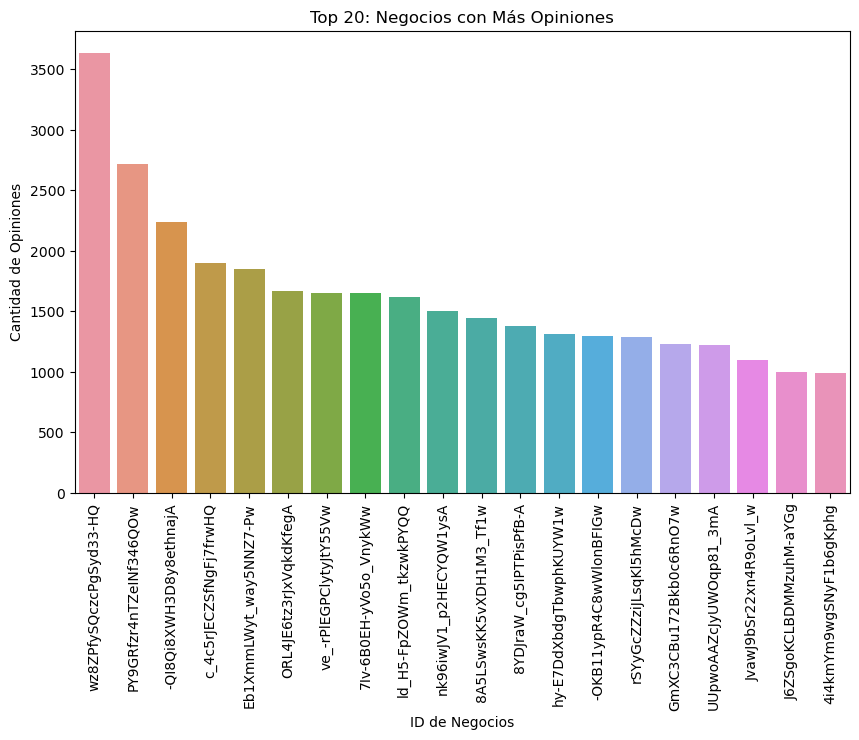

In [13]:
# Filtrar y clasificar los negocios por la cantidad de datos
top_business = df_review['business_id'].value_counts().head(20)

# Crear un nuevo DataFrame con las categorías principales
df_top_business = df_review[df_review['business_id'].isin(top_business.index)]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste del tamaño de la figura
sns.countplot(data=df_top_business, x='business_id', order=top_business.index)
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mayor legibilidad


# Agrega título y etiquetas de ejes
plt.title('Top 20: Negocios con Más Opiniones')
plt.xlabel('ID de Negocios')
plt.ylabel('Cantidad de Opiniones')

In [14]:
df_top_business2 = pd.DataFrame({'business_id': top_business.index, 'opinion_count': top_business.values})
df_top_business2

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 16, Finished, Available)

,business_id,opinion_count
0,wz8ZPfySQczcPgSyd33-HQ,3634
1,PY9GRfzr4nTZeINf346QOw,2715
2,-QI8Qi8XWH3D8y8ethnajA,2235
3,c_4c5rJECZSfNgFj7frwHQ,1896
4,Eb1XmmLWyt_way5NNZ7-Pw,1850
5,ORL4JE6tz3rJxVqkdKfegA,1670
6,ve_-rPlEGPClytyJtY55Vw,1653
7,7Iv-6B0EH-yVo5o_VnykWw,1650
8,ld_H5-FpZOWm_tkzwkPYQQ,1620
9,nk96iwJV1_p2HECYQW1ysA,1499


<font color='#307A71'>**12. Revisión de Vistas por Año:**</font> Teniendo en cuenta que la Data tiene un periodo de más de 10 años, se realiza conteo de los _**reviews**_ realizados por año para revisar el comportamiento de los datos en el periodo relacionado.

In [15]:
# Primero, agrupa los datos por año y mes, y cuenta la cantidad de opiniones en cada grupo
opinions_date = df_review.groupby([df_review['date'].dt.year.rename('anio')]).size().reset_index(name='quantity_opinions')

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 17, Finished, Available)

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 18, Finished, Available)

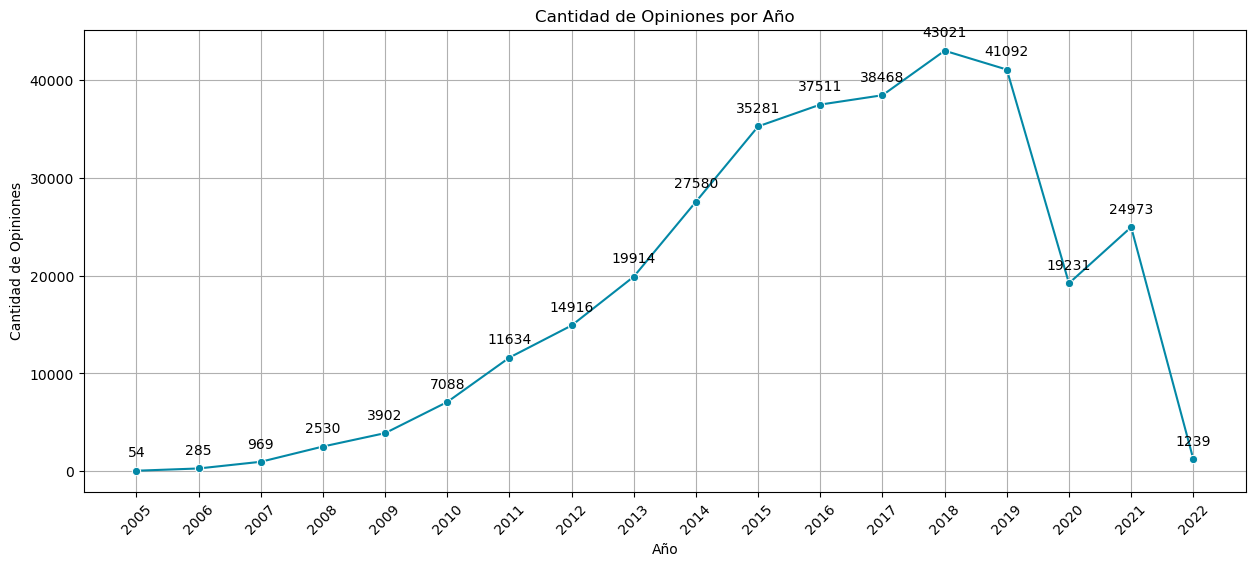

In [16]:
# Crea la gráfica de lineas
plt.figure(figsize=(15, 6))
sns.lineplot(x='anio', y='quantity_opinions', data=opinions_date, marker='o', color='#0388A6', linestyle='-')

plt.xlabel('Año')
plt.ylabel('Cantidad de Opiniones')
plt.title('Cantidad de Opiniones por Año')

# Establece un formato adecuado para las etiquetas del eje x (año)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Muestra cada año en el eje x

# Agregar etiquetas a los puntos de datos en el gráfico de líneas
for x, y in zip(opinions_date['anio'], opinions_date['quantity_opinions']):
    plt.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.grid(True)  # Agregar cuadrícula al gráfico

- Se observa que hasta el 2018 la tendencia de los datos era de una pendiente positiva en un incremento constante; en 2019 la reducción fue de _**-4,5%**_ y en 2020 la disminución fue de _**-53,2%**_, comportamiento atípico que pudo estar asociado a factores externos como la pandemia por el SARS-Cov-2 (COVID-19), situación que se recomienda tener en cuenta en el análisis de información en el proyecto por cuanto puede afectar resultados de tendencias y recomendaciones.

<font color='#307A71'>**13. Incluir Estados:**</font> Para efectos de realizar análisis de correlación de variables se extrae el Dataset de **'Busines'** y se incluye la columna de **'state'** a través de un merge mediante la variable **'business_id'**.

In [17]:
df_business = spark.read.format("csv").option("header","true").load("Files/data/original/Yelp/EDA_business.csv")
df_business = df_business.toPandas()
df_review = df_review.merge(df_business[['business_id', 'state']], on='business_id', how='left')
df_review.head()

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 19, Finished, Available)

,business_id,review_id,user_id,useful,funny,cool,text,date,state
0,n5P6-HWN3kFSYBxfVfDxEg,Poy3mAHxbbXmnxpagfVZyA,M3nt04JUU-r73VC2lwUSMA,7,9,2,I mistakenly left my organizer/wallet on my ta...,2012-06-26 01:32:56,TN
1,Xq-8-I0U8Artr7d70SjX-g,yvTEMKzV5CFKhw1-Jf7oCA,ITa3vh5ERI90G_WP4SmGUQ,14,26,11,The Good.\n\n-There's a very decent hoagie sho...,2010-08-22 12:27:12,IN
2,Z2ltNYVxmLaLGNVB7yFWQA,kdgC1ErBRXCtOWq9KEXsxQ,8ZryN_S-n48g6rsa3W3QtQ,19,17,17,Dang! another car rental review. \n\nBooked a ...,2013-05-16 22:45:33,PA
3,Xq-8-I0U8Artr7d70SjX-g,FL2TY1dwmVQ2lm1lIkcwzQ,2lFni8ituUYceQJPxlUy_w,2,14,1,"""Squawk!""\n\nI turned to my left.\n\n""SQUAWK!""...",2011-10-28 23:42:16,IN
4,Xq-8-I0U8Artr7d70SjX-g,R90fF9z_wxl5OrrmpLHuHg,SlH3DCXVxltSCo8gt9p2iQ,9,8,7,"Welcome to Philadelphia, the land of constantl...",2011-01-13 02:15:49,IN


<font color='#307A71'>**14. Ratio por Estados, Negocios y Vistas** </font> Se crea un nuevo DataFrame teniendo como _index_ la nueva variable de estados, adicionalmente se crean las varibles _'business_count'_, _'review_code'_ y _'ratio'_.

- Los ratios son herramientas importantes en el análisis de datos porque pueden ayudar a identificar patrones, tendencias o problemas en los datos.
- En el contexto de este proyecto de análisis de datos, el _**ratio**_ se refiere a la relación numérica entre las dos variables _'business_count'_ y _'review_code'_ agrupadas por estados, para identificar el promedio de reseñas por negocio en cada estado.
- Este ratio puede ser útil para comprender cómo se distribuyen las reseñas en relación con la cantidad de negocios en cada estado y puede proporcionar información sobre la actividad de reseñas en diferentes áreas geográficas.

In [18]:
# Calcular la cantidad de negocios por estado
business_count = df_review.groupby('state')['business_id'].nunique().reset_index(name='business_count')

# Calcular la cantidad de reseñas por estado
review_count = df_review.groupby('state')['text'].count().reset_index(name='review_count')

# Combinar ambos DataFrames en función del estado
result = review_count.merge(business_count, on='state')

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 20, Finished, Available)

In [24]:
result['Ratio'] = (result['review_count'] / result['business_count']).round(2)
result = result.sort_values(by='Ratio', ascending=False)
result

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 26, Finished, Available)

,state,review_count,business_count,Ratio
1,AZ,25519,388,65.77
0,AB,14335,219,65.46
13,TN,30948,493,62.77
8,LA,24888,397,62.69
3,DE,5159,85,60.69
10,NJ,18559,330,56.24
12,PA,72930,1322,55.17
2,CA,11009,200,55.04
11,NV,16657,306,54.43
4,FL,55221,1029,53.66


StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 22, Finished, Available)

Text(3, 16, 'Correlación: 0.99')

<Figure size 500x300 with 0 Axes>

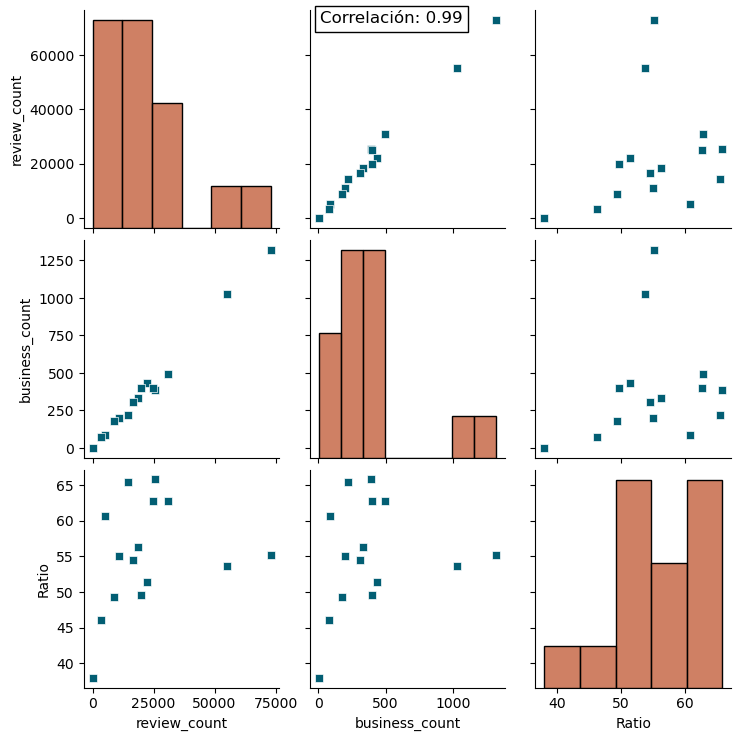

In [20]:
correlation = result['review_count'].corr(result['business_count'])
plt.figure(figsize=(5, 3))
sns.pairplot(result,
             plot_kws = {'color': '#025E73', 'marker': 's'},
             diag_kws = {'color': '#BF5630'})
plt.text(3, 16, f'Correlación: {correlation:.2f}', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 23, Finished, Available)

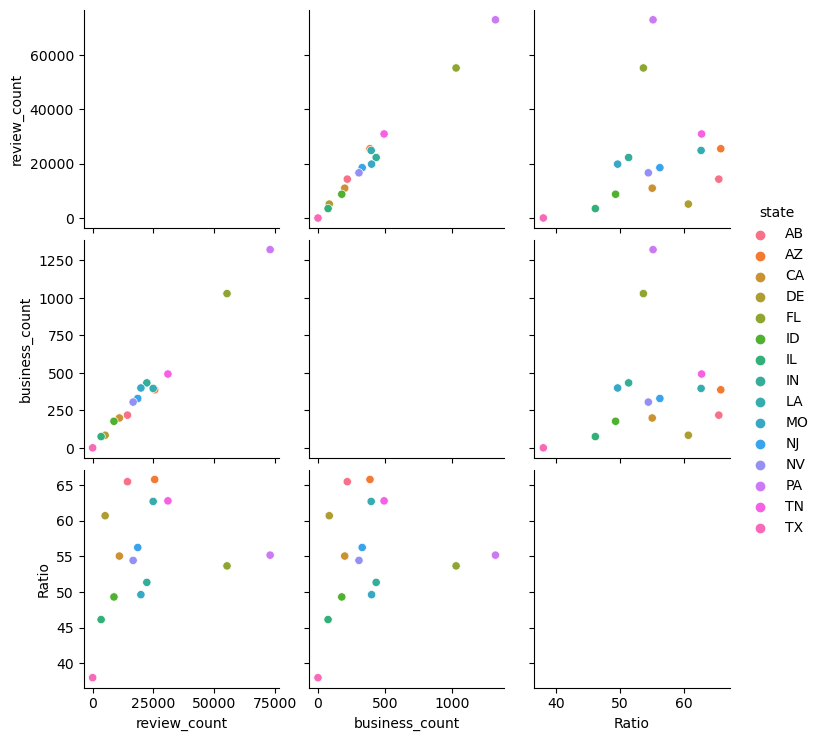

In [21]:
sns.pairplot(result, hue = "state")

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 24, Finished, Available)

/tmp/ipykernel_8237/1943363637.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = result.corr()


<AxesSubplot: >

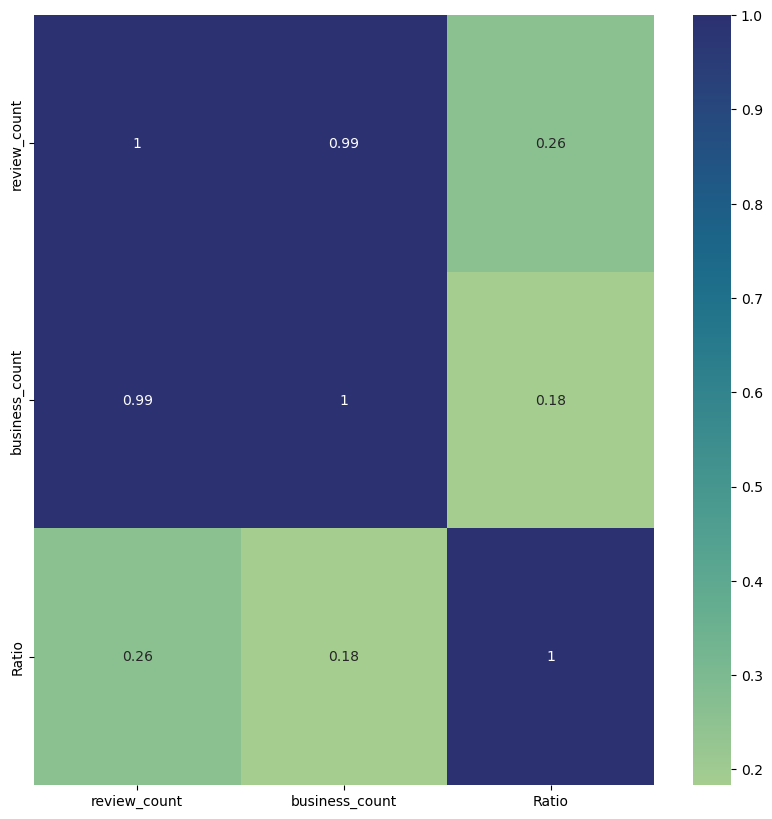

In [22]:
correlacion = result.corr()
plt.figure(figsize=[10,10])
sns.heatmap(correlacion, annot=True, cmap='crest')

StatementMeta(, f2676eb5-a2c0-4609-ba26-7210e30a1b0b, 25, Finished, Available)

(-0.5, 799.5, 399.5, -0.5)

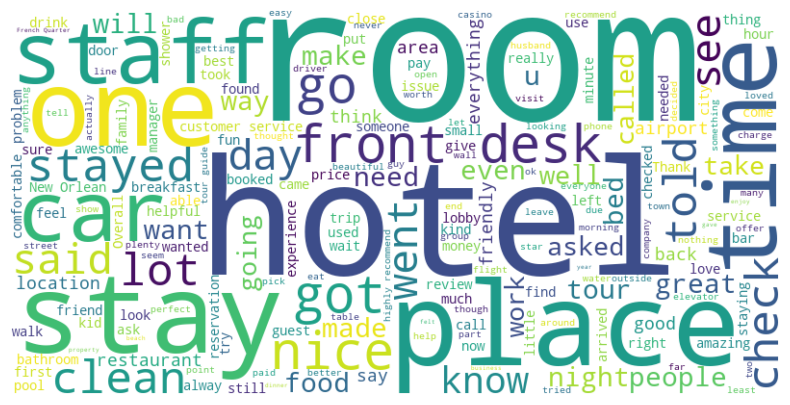

In [23]:
wordcloud = WordCloud(width=800, height=400, background_color='white')

text = " ".join(comment for comment in df_review['text'])
wordcloud.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')